# Data sets

- [Survey Valencia](https://www.valencia.es/cas/estadistica/barometro-municipal?p_p_id=EstadisticaBarometro_INSTANCE_FXJM3EFarKQI&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_EstadisticaBarometro_INSTANCE_FXJM3EFarKQI_jspPage=%2Fver_ficha_barometro.jsp&_EstadisticaBarometro_INSTANCE_FXJM3EFarKQI_ID=22)
- [Datos por districto](https://observatoriosaludvalencia.es/)
- [Lookup Table Distritos](https://valencia.opendatasoft.com/explore/dataset/districtes-distritos/export/)
- [Lookup Table Barrios](https://valencia.opendatasoft.com/explore/dataset/barris-barrios/export/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data_path = "./data/"

Mounted at /content/drive


In [ ]:
lookup_barrios = pd.read_csv(data_path + "barris-barrios.csv", delimiter=";")
lookup_districts = pd.read_csv(data_path + "districtes-distritos.csv", delimiter=";")
survey_telework_valuencia = pd.read_csv(data_path + "survey-valencia-remote-work.csv", delimiter=";")
desempleo_larga_duracion_valencia = pd.read_csv(data_path + "EE2_Desempleo_registrado_de_larga_duracion.csv", delimiter=";")
desempleo_valencia = pd.read_csv(data_path + "EE1_Desempleo_registrado.csv", delimiter=";")
salud_mental_valencia = pd.read_csv(data_path + "SM2_Salud_mental.csv", delimiter=";")
salud_mental_autopercibida_valencia = pd.read_csv(data_path + "SM1_Salud_autopercibida.csv", delimiter=";")
obesidad_valencia = pd.read_csv(data_path + "OB1_Obesidad.csv", delimiter=";")
apoyo_social_valencia = pd.read_csv(data_path + "RS2_Grado_de_apoyo_social.csv", delimiter=";")

## Build lookup table

In [ ]:
lookup_districts = lookup_districts.rename(
    columns = { "Código distrito": "Codigo distrito"}
)

In [ ]:
barrios_districts_lookup = lookup_barrios.join(lookup_districts, on = "Codigo distrito", how = "left", lsuffix = ".barrio", rsuffix = ".district")

## Clean the unemployment datasets

In [ ]:
desempleo_larga_duracion_valencia = desempleo_larga_duracion_valencia[1:20]
desempleo_larga_duracion_valencia = desempleo_larga_duracion_valencia[["Territorio", "Desempleo registrado de larga duracion"]]
desempleo_larga_duracion_valencia["Codigo distrito"] = range(1, 20)
desempleo_larga_duracion_valencia["Desempleo registrado de larga duracion"] = pd.to_numeric(desempleo_larga_duracion_valencia["Desempleo registrado de larga duracion"]).astype(float)

In [ ]:
desempleo_valencia = desempleo_valencia[1:20]
desempleo_valencia = desempleo_valencia[["Territorio", "Desempleo registrado"]]
desempleo_valencia["Codigo distrito"] = range(1, 20)
desempleo_valencia["Desempleo registrado"] = pd.to_numeric(desempleo_valencia["Desempleo registrado"]).astype(float)

In [ ]:
survey_telework_valuencia.loc[survey_telework_valuencia.index[1:], "Codigo distrito"] = range(1, 20)
survey_telework_valuencia = survey_telework_valuencia[1:]

## Cleanup other datasets

In [ ]:
salud_mental_valencia = salud_mental_valencia[1:20]
salud_mental_valencia = salud_mental_valencia[["Territorio", "Salud mental"]]
salud_mental_valencia["Codigo distrito"] = range(1, 20)
salud_mental_valencia["Salud mental"] = pd.to_numeric(salud_mental_valencia["Salud mental"]).astype(float)

In [ ]:
salud_mental_autopercibida_valencia = salud_mental_autopercibida_valencia[1:20]
salud_mental_autopercibida_valencia = salud_mental_autopercibida_valencia[["Territorio", "Salud autopercibida"]]
salud_mental_autopercibida_valencia["Codigo distrito"] = range(1, 20)
salud_mental_autopercibida_valencia["Salud autopercibida"] = pd.to_numeric(salud_mental_autopercibida_valencia["Salud autopercibida"]).astype(float)

In [ ]:
obesidad_valencia = obesidad_valencia[1:20]
obesidad_valencia = obesidad_valencia[["Territorio", "Obesidad"]]
obesidad_valencia["Codigo distrito"] = range(1, 20)
obesidad_valencia["Obesidad"] = pd.to_numeric(obesidad_valencia["Obesidad"]).astype(float)

In [ ]:
apoyo_social_valencia = apoyo_social_valencia[1:20]
apoyo_social_valencia = apoyo_social_valencia[["Territorio", "Grado de apoyo social"]]
apoyo_social_valencia["Codigo distrito"] = range(1, 20)
apoyo_social_valencia["Grado de apoyo social"] = pd.to_numeric(apoyo_social_valencia["Grado de apoyo social"]).astype(float)

## Combine datasets

In [ ]:
teleworking_unemployment_combined1 = survey_telework_valuencia.join(desempleo_larga_duracion_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")
teleworking_unemployment_combined2 = survey_telework_valuencia.join(desempleo_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")
salud_mental_combined1 = survey_telework_valuencia.join(salud_mental_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")
salud_mental_combined2 = survey_telework_valuencia.join(salud_mental_autopercibida_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")
obesidad_combined2 = survey_telework_valuencia.join(obesidad_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")
apoyo_social_combined = salud_mental_valencia.join(apoyo_social_valencia, on = "Codigo distrito", lsuffix=".l", rsuffix = ".r")

<ipython-input-73-ff20c1470031>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])


Text(0, 0.5, 'Desempleo registrado')

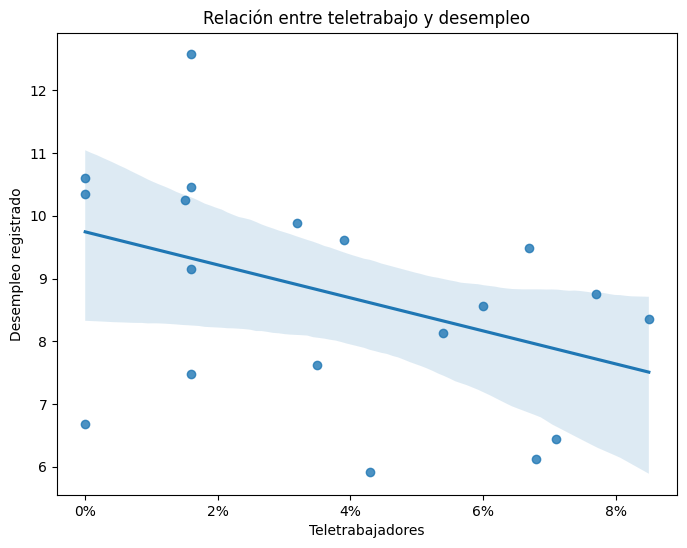

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed

sn.regplot(x = "A la seua pròpia casa (teletreball)",
           y = "Desempleo registrado",
           data = teleworking_unemployment_combined2)

vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])

plt.title("Relación entre teletrabajo y desempleo")
plt.xlabel("Teletrabajadores")
plt.ylabel("Desempleo registrado")

In [ ]:
from scipy.stats import pearsonr

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(teleworking_unemployment_combined2["A la seua pròpia casa (teletreball)"], teleworking_unemployment_combined2["Desempleo registrado"])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson's correlation coefficient: -0.416
P-value: 0.077


<ipython-input-79-0e19cf4996e4>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])


Text(0, 0.5, 'Nivel de salud mental')

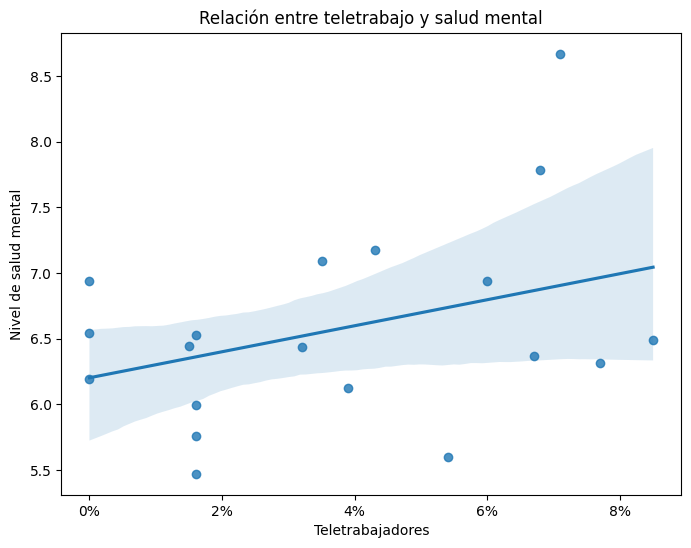

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed

sn.regplot(x = "A la seua pròpia casa (teletreball)",
           y = "Salud mental",
           data = salud_mental_combined1)

vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])

plt.title("Relación entre teletrabajo y salud mental")
plt.xlabel("Teletrabajadores")
plt.ylabel("Nivel de salud mental")

In [ ]:
from scipy.stats import pearsonr

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(salud_mental_combined1["A la seua pròpia casa (teletreball)"], salud_mental_combined1["Salud mental"])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson's correlation coefficient: 0.365
P-value: 0.124


<ipython-input-78-24af9a3b5961>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])


Text(0.5, 0, 'Grado de apoyo social')

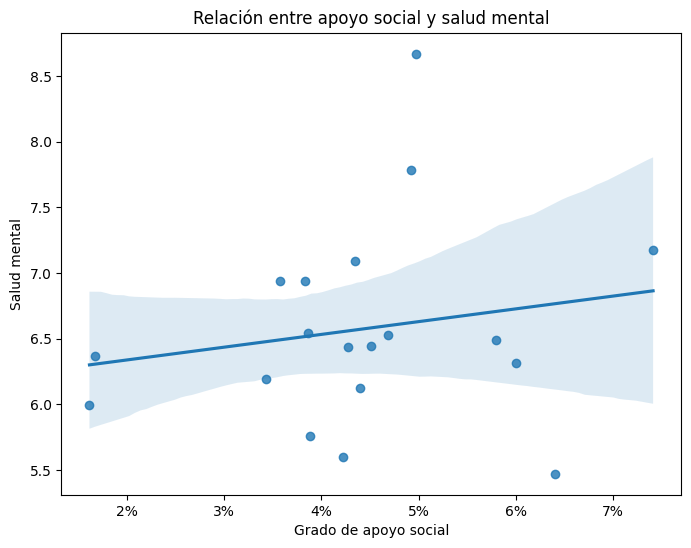

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed


sn.regplot(y = "Salud mental",
           x = "Grado de apoyo social",
           data = apoyo_social_combined)

vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])

plt.title("Relación entre apoyo social y salud mental")
plt.ylabel("Salud mental")
plt.xlabel("Grado de apoyo social")

In [ ]:
from scipy.stats import pearsonr

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(apoyo_social_combined["Grado de apoyo social"], apoyo_social_combined["Salud mental"])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson's correlation coefficient: 0.181
P-value: 0.459


<ipython-input-267-d0ad766e97e7>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
<ipython-input-267-d0ad766e97e7>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])


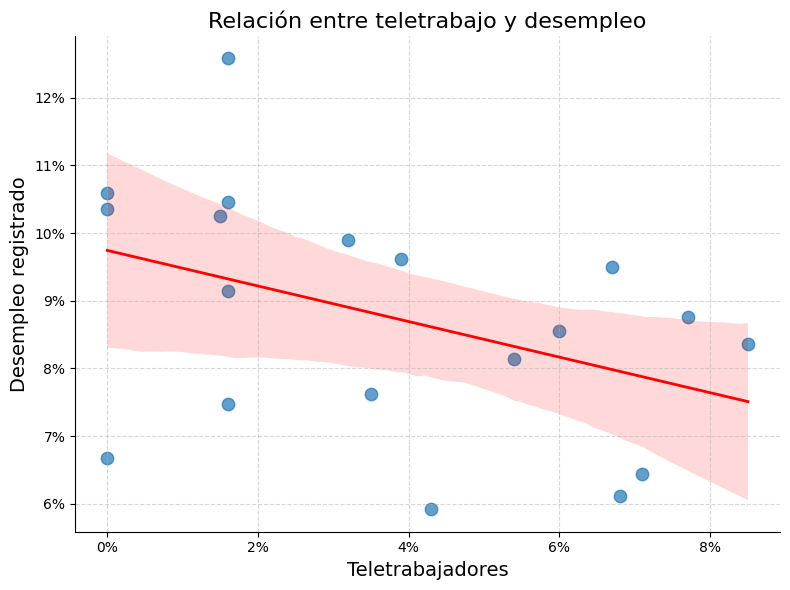

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming teleworking_unemployment_combined2 is your DataFrame

# Create the scatter plot with regression line
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
sns.regplot(x="A la seua pròpia casa (teletreball)",
            y="Desempleo registrado",
            data=teleworking_unemployment_combined2,
            ax=ax,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Adjust marker size and transparency
            line_kws={'color': 'red', 'linewidth': 2})  # Adjust line color and width

# Set plot title and labels with larger font size
plt.title("Relación entre teletrabajo y desempleo", fontsize=16)
plt.xlabel("Teletrabajadores", fontsize=14)
plt.ylabel("Desempleo registrado", fontsize=14)

# Format y-axis tick labels to include percentage sign
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

<ipython-input-37-3585dbcf1cb4>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])


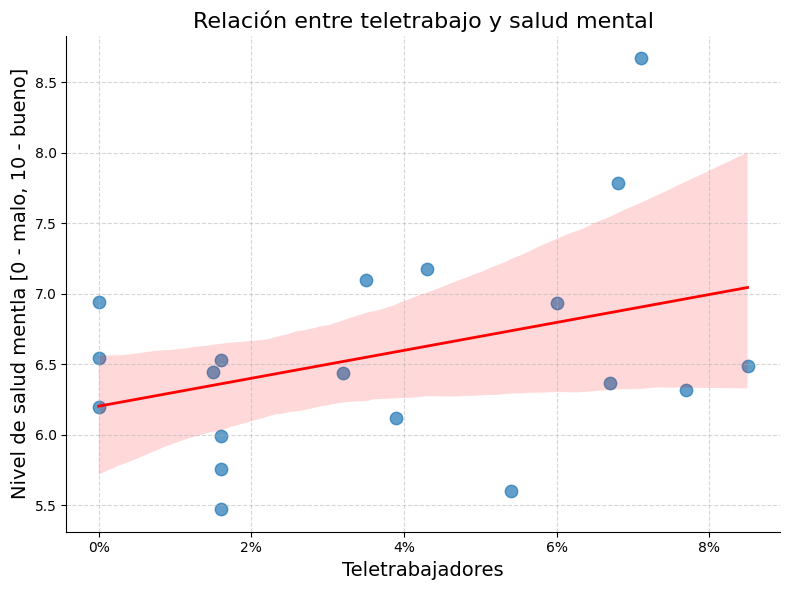

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming teleworking_unemployment_combined2 is your DataFrame

# Create the scatter plot with regression line
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
sns.regplot(x="A la seua pròpia casa (teletreball)",
            y="Salud mental",
            data=salud_mental_combined1,
            ax=ax,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Adjust marker size and transparency
            line_kws={'color': 'red', 'linewidth': 2})  # Adjust line color and width

# Set plot title and labels with larger font size
plt.title("Relación entre teletrabajo y salud mental", fontsize=16)
plt.xlabel("Teletrabajadores", fontsize=14)
plt.ylabel("Nivel de salud mentla [0 - malo, 10 - bueno]", fontsize=14)

vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}%'.format(x) for x in vals_x])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [ ]:
survey_telework_valuencia

,Unnamed: 0,A la seua pròpia casa (teletreball),Al local de l’empresa,En tots dos llocs,No té local de treball fix,No sap,(N),Codigo distrito
1,1. Ciutat Vella,7.1,71.4,16.1,5.4,0.0,NaN,1.0
2,2. l'Eixample,6.8,79.7,11.9,1.7,0.0,NaN,2.0
3,3. Extramurs,1.6,75.8,8.1,14.5,0.0,NaN,3.0
4,4. Campanar,3.5,86.0,5.3,5.3,0.0,NaN,4.0
5,5. la Saïdia,6.7,66.7,8.3,16.7,1.7,NaN,5.0
6,6. el Pla del Real,4.3,72.3,21.3,2.1,0.0,NaN,6.0
7,7. l'Olivereta,0.0,76.3,10.2,13.6,0.0,NaN,7.0
8,8. Patraix,7.7,66.2,9.2,16.9,0.0,NaN,8.0
9,9. Jesús,3.2,79.0,6.5,11.3,0.0,NaN,9.0
10,10. Quatre Carreres,1.5,86.8,7.4,4.4,0.0,NaN,10.0


In [ ]:
from scipy.stats import pearsonr

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(teleworking_unemployment_combined2["Desempleo registrado"], teleworking_unemployment_combined2["A la seua pròpia casa (teletreball)"])

# Print the results
print(f"Pearson's correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson's correlation coefficient: -0.416
P-value: 0.077


In [ ]:
teleworking_unemployment_combined2["Desempleo registrado"]

,Desempleo registrado
1,6.442706
2,6.118319
3,7.480027
4,7.620050
5,9.494439
6,5.919741
7,10.350727
8,8.757536
9,9.891755
10,10.254256


<ipython-input-274-04c8d770cd0a>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])


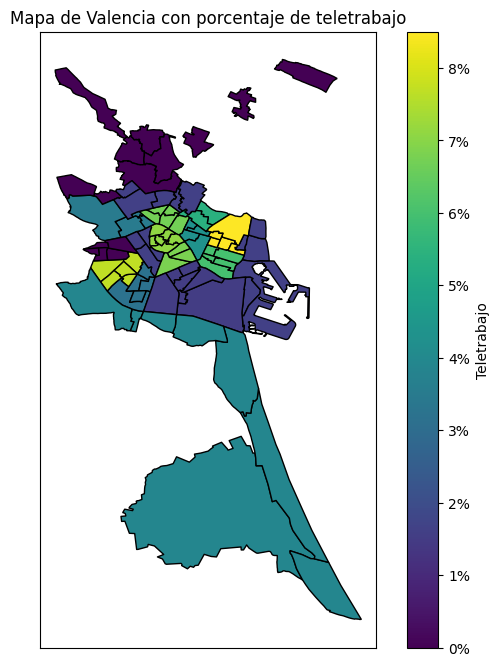

In [ ]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

geojson_features = []

for index, row in barrios_districts_lookup.iterrows():
    geometry = json.loads(row["geo_shape.barrio"])
    geojson_features.append({
        "type": "Feature",
        "geometry": geometry,
        "properties": {
            "district": row["Codigo distrito"],
            "telework": survey_telework_valuencia[survey_telework_valuencia["Codigo distrito"] == row["Codigo distrito"]]["A la seua pròpia casa (teletreball)"].values[0] if not survey_telework_valuencia[survey_telework_valuencia["Codigo distrito"] == row["Codigo distrito"]]["A la seua pròpia casa (teletreball)"].empty else None # Accessing the first value
        }
    })


gdf = gpd.GeoDataFrame.from_features(geojson_features)


fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, column="telework", cmap='viridis', legend=True, edgecolor="black", legend_kwds={'label': "Teletrabajo"})


plt.title("Mapa de Valencia con porcentaje de teletrabajo")
ax.set_xticks([])
ax.set_yticks([])

cax = fig.axes[1]  # Assuming the colorbar is the second axis in the figure

# Format colorbar tick labels to include percentage sign
vals = cax.get_yticks()
cax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

plt.show()

<ipython-input-276-387f241c17a3>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])


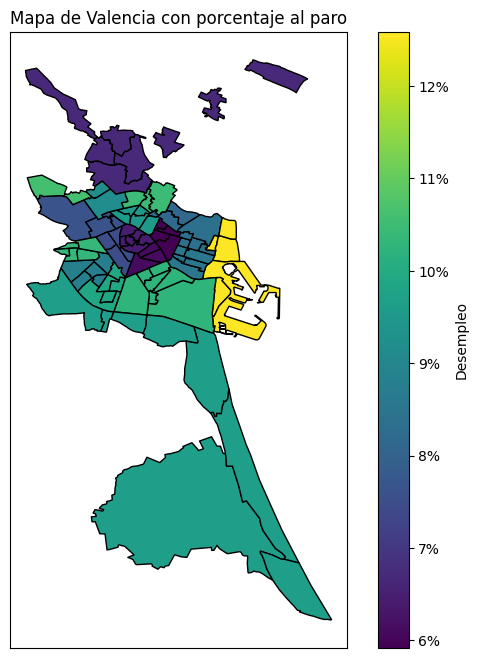

In [ ]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

geojson_features = []

for index, row in barrios_districts_lookup.iterrows():
    geometry = json.loads(row["geo_shape.barrio"])
    geojson_features.append({
        "type": "Feature",
        "geometry": geometry,
        "properties": {
            "district": row["Codigo distrito"],
            "unemployment": desempleo_valencia[desempleo_valencia["Codigo distrito"] == row["Codigo distrito"]]["Desempleo registrado"].values[0] if not desempleo_valencia[desempleo_valencia["Codigo distrito"] == row["Codigo distrito"]]["Desempleo registrado"].empty else None # Accessing the first value
        }
    })


gdf = gpd.GeoDataFrame.from_features(geojson_features)


fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, column="unemployment", cmap='viridis', legend=True, edgecolor="black", legend_kwds={'label': "Desempleo"})


plt.title("Mapa de Valencia con porcentaje al paro")
ax.set_xticks([])
ax.set_yticks([])

cax = fig.axes[1]  # Assuming the colorbar is the second axis in the figure

# Format colorbar tick labels to include percentage sign
vals = cax.get_yticks()
cax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

plt.show()

In [ ]:
desempleo_valencia

,Territorio,Desempleo registrado,Codigo distrito
1,la Seu + la Xerea + el Carme + el Pilar + el M...,6.442706,1
2,2.1 Russafa + el Pla del Remei + Gran Via,6.118319,2
3,el Botànic + la Roqueta + la Petxina + Arranca...,7.480027,3
4,Campanar + les Tendetes + el Calvari + Sant Pau,7.620050,4
5,Marxalenes + Morvedre + Trinitat + Tormos + Sa...,9.494439,5
6,Exposició + Mestalla + Jaume Roig + Ciutat Uni...,5.919741,6
7,Nou Moles + Soternes + Tres Forques + la Fonts...,10.350727,7
8,Patraix + Sant Isidre + Vara de Quart + el Saf...,8.757536,8
9,la Raiosa + l'Hort de Senabre + la Creu Cobert...,9.891755,9
10,Mont-Olivet + en Corts + Malilla + la Fonteta ...,10.254256,10
